# TIC TAC TOE

In [2]:
import cv2
import imutils
from matplotlib import pyplot as plt
import numpy as np


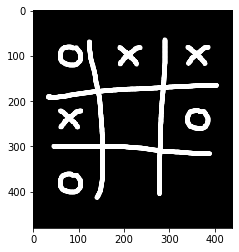

In [3]:
image = cv2.imread('tictactoe.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)

O (Contour #1) -- solidity=0.98
X (Contour #2) -- solidity=0.60
O (Contour #3) -- solidity=0.98
X (Contour #4) -- solidity=0.60
X (Contour #5) -- solidity=0.60
O (Contour #6) -- solidity=0.98
? (Contour #7) -- solidity=0.28


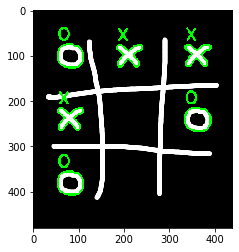

In [4]:
# find all contours on the tic-tac-toe board
cnts = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # external-most contours only
# cnts = imutils.grab_contours(cnts)
cnts = cnts[0]

# loop over the contours
for (i, c) in enumerate(cnts):
    # compute the area of the contour along with the bounding box
    # to compute the aspect ratio
    area = cv2.contourArea(c) # number of pixels that reside inside the contour 
    (x, y, w, h) = cv2.boundingRect(c)

    # compute the convex hull of the contour, then use the area of the
    # original contour and the area of the convex hull to compute the
    # solidity
    hull = cv2.convexHull(c)
    hullArea = cv2.contourArea(hull)
    solidity = area / float(hullArea)
    
    char = '?'
    if solidity > 0.9:
        char = 'O'
    elif solidity > 0.5:
        char = 'X'
    
    if char != '?':
        cv2.drawContours(image, [c], -1, (0, 255, 0), 3)
        cv2.putText(image, char, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.25, (0, 255, 0), 4)
        
    print("{} (Contour #{}) -- solidity={:.2f}".format(char, i + 1, solidity))
    
# show the output image
plt.imshow(image)

# TETRIS BLOCKS

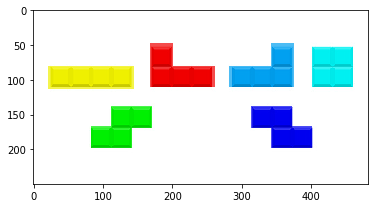

In [5]:
image = cv2.imread("tetris_blocks.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]

# show the original and thresholded images
plt.imshow(image)

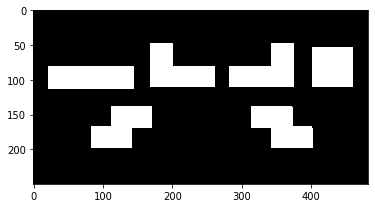

In [6]:
plt.imshow(thresh, cmap = 'gray')

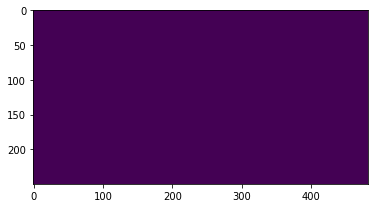

In [7]:

# find external contours in the thresholded image and allocate memory
# for the convex hull image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# cnts = imutils.grab_contours(cnts)
cnts = cnts[0]
hullImage = np.zeros(gray.shape[:2], dtype="uint8")
plt.imshow(hullImage)

In [8]:
# The aqua piece is known as a Rectangle. 
# The blue and orange blocks are called L-pieces. 
# The yellow shape is obviously a Square. 
# And the green and red bricks on the bottom are called Z-pieces.

Contour #1 -- aspect_ratio=1.48, extent=0.66, solidity=0.81
Contour #2 -- aspect_ratio=1.47, extent=0.65, solidity=0.80
Contour #3 -- aspect_ratio=3.76, extent=0.96, solidity=1.00
Contour #4 -- aspect_ratio=1.00, extent=0.97, solidity=1.00
Contour #5 -- aspect_ratio=1.49, extent=0.63, solidity=0.79
Contour #6 -- aspect_ratio=1.49, extent=0.63, solidity=0.79


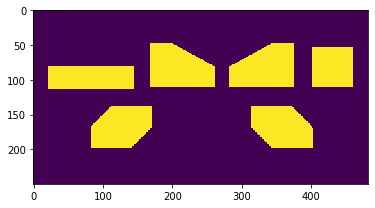

In [11]:
# loop over the contours

for (i,c) in enumerate(cnts):
    area = cv2.contourArea(c)
    (x, y, w, h) = cv2.boundingRect(c)
    
    aspectRatio = w / float(h) # width/height
    extent = area / float(w * h) # shape area / bounding box area
    hull = cv2.convexHull(c)
    hullArea = cv2.contourArea(hull)
    solidity = area / float(hullArea)
    
    cv2.drawContours(hullImage, [hull], -1, 255, -1)
    cv2.drawContours(image, [c], -1, (240, 0, 159), 3)
    shape = ""
    
    if aspectRatio >= 0.98 and aspectRatio <= 1.02:
        shape = "SQUARE"
 
    # if the width is 3x longer than the height, then we have a rectangle
    elif aspectRatio >= 3.0:
        shape = "RECTANGLE"
 
    # if the extent is sufficiently small, then we have a L-piece
    elif extent < 0.65:
        shape = "L-PIECE"
 
    # if the solidity is sufficiently large enough, then we have a Z-piece
    elif solidity > 0.80:
        shape = "Z-PIECE"

    cv2.putText(image, shape, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (240, 0, 159), 2)
    print("Contour #{} -- aspect_ratio={:.2f}, extent={:.2f}, solidity={:.2f}".format(i + 1, aspectRatio, extent, solidity))
    plt.imshow(hullImage)
#     plt.imshow(image)
    

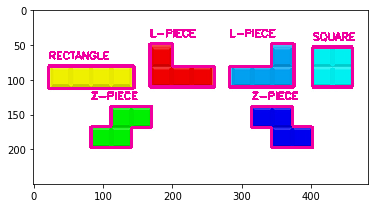

In [12]:
plt.imshow(image)